## <center>UNITED NATION GENERAL ASSEMBLY VOTES</center> 

## <center>1946-2017</center>  



In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# estimators
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# model metrics
from sklearn.model_selection import cross_val_score
import sklearn.metrics as skm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

# cross validation
from sklearn.cross_validation import train_test_split


# parameter tuning
from sklearn.grid_search import GridSearchCV

In [212]:
UN = pd.read_csv('UNGA_2.csv', encoding = 'latin-1')

In [213]:
UN.shape

(1099156, 25)

## <center>Understanding the data</center>
### <center>General overview</center>

<center>**Data**</center> 


**Source of the data:** 

United Nations General Assembly Voting (DataVersion 18.0)

Voeten, Erik; Strezhnev, Anton; Bailey, Michael, 2009, "United Nations General Assembly Voting Data", https://hdl.handle.net/1902.1/12379, Harvard Dataverse, V18, UNF:6:xkt0YWtoBCThQeTJWAuLfg==



**Data structure:**

1099156 observations representing voting status per every country within 1946 - 2017 

26 variables


<center>**Variables description**</center>



**vote** – vote choice:

1 – Yes

2 – Abstain

3 – No

8 – Absent

9 – Not a member


**importantvote** - Vote identified as important by U.S. State Department report Voting Practices in the United Nations. These reports began being issued in session 39.



**short** - short description of a voting subject 

**rcall** - roll call

**ME:** Votes relating to the Palestinian conflict

**NU:** Votes relating to nuclear weapons and nuclear material

**DI:** Votes relating to arms control and disarmament

**CO:** Votes relating to colonialism

**HR:** Votes relating to human rights

**EC:** Votes relating to (economic) development




In [214]:
pd.set_option('display.max_column', 25)

UN.head(3000)

,rcid,ccode,session.x,member,vote,Country,Countryname,year.x,session.y,abstain,yes,no,importantvote,date,unres,amend,para,short,me,nu,di,hr,co,ec,year.y
0,3,2,1.0,1.0,1,USA,United States of America,1946,1,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",0,0,0,0,0,0,1946
1,3,20,1.0,1.0,3,CAN,Canada,1946,1,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",0,0,0,0,0,0,1946
2,3,31,1.0,NaN,9,BHS,Bahamas,1946,1,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",0,0,0,0,0,0,1946
3,3,40,1.0,1.0,1,CUB,Cuba,1946,1,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",0,0,0,0,0,0,1946
4,3,41,1.0,1.0,1,HTI,Haiti,1946,1,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",0,0,0,0,0,0,1946
5,3,42,1.0,1.0,1,DOM,Dominican Republic,1946,1,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",0,0,0,0,0,0,1946
6,3,51,1.0,NaN,9,JAM,Jamaica,1946,1,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",0,0,0,0,0,0,1946
7,3,52,1.0,NaN,9,TTO,Trinidad and Tobago,1946,1,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",0,0,0,0,0,0,1946
8,3,53,1.0,NaN,9,BRB,Barbados,1946,1,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",0,0,0,0,0,0,1946
9,3,54,1.0,NaN,9,DMA,Dominica,1946,1,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",0,0,0,0,0,0,1946


In [215]:
UN.tail()

,rcid,ccode,session.x,member,vote,Country,Countryname,year.x,session.y,abstain,yes,no,importantvote,date,unres,amend,para,short,me,nu,di,hr,co,ec,year.y
1099151,5617,552,72.0,1.0,1,ZWE,Zimbabwe,2017,72,14,125,39,1,2017-12-04,A/RES/72/31,NaN,NaN,Taking forward multilateral nuclear disarmamen...,0,1,1,0,0,0,2017
1099152,5618,552,72.0,1.0,1,ZWE,Zimbabwe,2017,72,62,125,0,0,2017-12-04,A/RES/72/25,NaN,NaN,Conclusion of effective international arrangem...,0,1,1,0,0,0,2017
1099153,5638,552,72.0,1.0,1,ZWE,Zimbabwe,2017,72,0,135,2,0,2017-12-08,A/RES/72/129,NaN,NaN,Moderation : resolution / adopted by the Gener...,0,0,0,0,0,0,2017
1099154,5619,552,72.0,1.0,1,ZWE,Zimbabwe,2017,72,27,141,15,0,2017-12-04,A/RES/72/30,NaN,NaN,Humanitarian consequences of nuclear weapons :...,0,1,1,0,0,0,2017
1099155,5588,552,72.0,1.0,1,ZWE,Zimbabwe,2017,72,35,128,9,1,2017-12-21,A/RES/ES-10/19,NaN,NaN,Status of Jerusalem : resolution / adopted by ...,1,0,0,0,0,0,2017


In [216]:
UN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099156 entries, 0 to 1099155
Data columns (total 25 columns):
rcid             1099156 non-null int64
ccode            1099156 non-null int64
session.x        1098964 non-null float64
member           846858 non-null float64
vote             1099156 non-null int64
Country          1091797 non-null object
Countryname      1098987 non-null object
year.x           1099156 non-null int64
session.y        1099156 non-null int64
abstain          1099156 non-null int64
yes              1099156 non-null int64
no               1099156 non-null int64
importantvote    1099156 non-null int64
date             1099156 non-null object
unres            1069409 non-null object
amend            560268 non-null float64
para             560268 non-null float64
short            1069434 non-null object
me               1099156 non-null int64
nu               1099156 non-null int64
di               1099156 non-null int64
hr               1099156 non-null int

## <center>Data cleaning</center>

In [217]:
del UN['short']
del UN['session.y']
del UN['year.y']
del UN['para']
del UN['amend']
del UN['unres']
del UN['date']
del UN['Country']
del UN['member']

In [218]:
UN.head()

,rcid,ccode,session.x,vote,Countryname,year.x,abstain,yes,no,importantvote,me,nu,di,hr,co,ec
0,3,2,1.0,1,United States of America,1946,4,29,18,0,0,0,0,0,0,0
1,3,20,1.0,3,Canada,1946,4,29,18,0,0,0,0,0,0,0
2,3,31,1.0,9,Bahamas,1946,4,29,18,0,0,0,0,0,0,0
3,3,40,1.0,1,Cuba,1946,4,29,18,0,0,0,0,0,0,0
4,3,41,1.0,1,Haiti,1946,4,29,18,0,0,0,0,0,0,0


In [219]:
UN.index = UN.index + 1

In [220]:
UN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099156 entries, 1 to 1099156
Data columns (total 16 columns):
rcid             1099156 non-null int64
ccode            1099156 non-null int64
session.x        1098964 non-null float64
vote             1099156 non-null int64
Countryname      1098987 non-null object
year.x           1099156 non-null int64
abstain          1099156 non-null int64
yes              1099156 non-null int64
no               1099156 non-null int64
importantvote    1099156 non-null int64
me               1099156 non-null int64
nu               1099156 non-null int64
di               1099156 non-null int64
hr               1099156 non-null int64
co               1099156 non-null int64
ec               1099156 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 134.2+ MB


In [221]:
# renaming the features

#ME: Votes relating to the Palestinian conflict
#NU: Votes relating to nuclear weapons and nuclear material
#DI: Votes relating to arms control and disarmament
#CO: Votes relating to colonialism
#HR: Votes relating to human rights
#EC: Votes relating to (economic) development

UN = UN.rename(columns = {'Countryname': 'country', 'year.x': 'year', 'ccode': 'country code',  
                          'importantvote': 'imp_vote', 'me': 'Palestine', 'session.x': 'session', 
                         'nu': 'nuclear_weapons', 'di': 'disarmament', 'co':'colonization', 'hr': 'human_rights', 'ec': 'economic_development'})
UN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099156 entries, 1 to 1099156
Data columns (total 16 columns):
rcid                    1099156 non-null int64
country code            1099156 non-null int64
session                 1098964 non-null float64
vote                    1099156 non-null int64
country                 1098987 non-null object
year                    1099156 non-null int64
abstain                 1099156 non-null int64
yes                     1099156 non-null int64
no                      1099156 non-null int64
imp_vote                1099156 non-null int64
Palestine               1099156 non-null int64
nuclear_weapons         1099156 non-null int64
disarmament             1099156 non-null int64
human_rights            1099156 non-null int64
colonization            1099156 non-null int64
economic_development    1099156 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 134.2+ MB


#### Variable 'vote'

In [222]:
# number of values (labels)

UN.vote.nunique()

5

In [223]:
# Vote choice:
# 1 = Yes
# 2 = Abstain
# 3 = No
# 8 = Not present
# 9 = Not a member

UN.vote.value_counts()

1    613058
9    254521
2     98627
8     75966
3     56984
Name: vote, dtype: int64

In [224]:
UN.vote.count()

1099156

In [225]:
# Rows with a country status "Not present" (8) and "Not a member" (9) are removed

UN = UN.loc[UN['vote'] <= 3, :]
UN.head()

,rcid,country code,session,vote,country,year,abstain,yes,no,imp_vote,Palestine,nuclear_weapons,disarmament,human_rights,colonization,economic_development
1,3,2,1.0,1,United States of America,1946,4,29,18,0,0,0,0,0,0,0
2,3,20,1.0,3,Canada,1946,4,29,18,0,0,0,0,0,0,0
4,3,40,1.0,1,Cuba,1946,4,29,18,0,0,0,0,0,0,0
5,3,41,1.0,1,Haiti,1946,4,29,18,0,0,0,0,0,0,0
6,3,42,1.0,1,Dominican Republic,1946,4,29,18,0,0,0,0,0,0,0


In [226]:
UN.vote.value_counts()

1    613058
2     98627
3     56984
Name: vote, dtype: int64

In [227]:
UN.vote.count()

768669

In [228]:
# variables as factors

#UN.vote = UN.country.astype('category')
#UN.country = UN.country.astype('category')
#UN.imp_vote = UN.imp_vote.astype('category')
#UN['year.x'] = UN['year'].astype('category')
#UN['country code'] = UN['country code'].astype('category')

## <center>Exploratory Data Analysis</center>

### <center>Votes</center>

Vote choice:

1 = Yes

2 = Abstain

3 = No

In [229]:
UN.vote.value_counts()

1    613058
2     98627
3     56984
Name: vote, dtype: int64

In [230]:
votes_total = UN.vote.count()
votes_total

768669

In [231]:
# Proportion of 'yes' votes: 1946-2017

yes = UN.vote[UN.vote == 1].value_counts()
yes

1    613058
Name: vote, dtype: int64

In [232]:
perc_yes = yes / votes_total
perc_yes

1    0.797558
Name: vote, dtype: float64

In [233]:
# Proportion of 'no' votes: 1946-2017

no = UN.vote[UN.vote == 3].value_counts()
no

3    56984
Name: vote, dtype: int64

In [234]:
perc_no = no / votes_total
perc_no

3    0.074133
Name: vote, dtype: float64

In [235]:
# Proportion of 'abstain' votes: 1946-2017

abstain = UN.vote[UN.vote == 2].value_counts()
abstain

2    98627
Name: vote, dtype: int64

In [236]:
perc_abstain = abstain / votes_total
perc_abstain

2    0.128309
Name: vote, dtype: float64

In [237]:
# Plot: proportions ('yes', 'no', abstain)

In [238]:
df_perc = pd.DataFrame({'abstain':[0.128309], 'yes': [0.797558], 'no': [0.074133]})
df_perc

,abstain,no,yes
0,0.128309,0.074133,0.797558


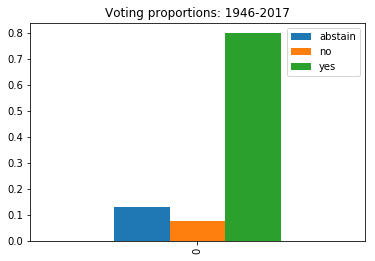

In [239]:
plot = df_perc.plot(kind = "bar", title = 'Voting proportions: 1946-2017')

<center>**Initial observations**</center>

Dominant amount - 80 % - of votes are 'yes' votes, 'no' votes - only 7 % and abstain - 13 %.


<center>**Next step:**</center> 
Votes frequency relating to:

- years,

- countries,

- country and year.



### <center>Years</center>

Which are the most active years in regards to votes frequency?

**<center>Votes frequency and years</center>** 

Votes: 'yes', 'no' and 'abstain' are presented in every row, however these numbers are related to Roll call ID: 'rcid'.   


All votes: 'yes', 'no' and 'abstain'

In [240]:
years_votes = UN['year'].count()
years_votes

768669

#### Votes within all the years

In [241]:
years_votes = UN['year'].value_counts().sort_index()
years_votes.head()

1946    2143
1947    2039
1948    3454
1949    5700
1950    2911
Name: year, dtype: int64

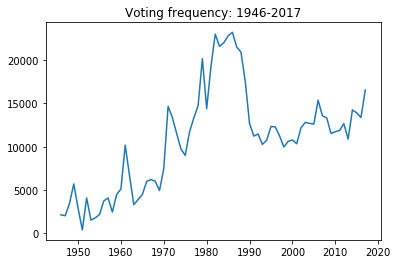

In [242]:
# plot: years and frequency of votes  

years_votes.plot(title = 'Voting frequency: 1946-2017')

In [243]:
# alternatively
# year + size of each group

UN.groupby('year').size().head()

year
1946    2143
1947    2039
1948    3454
1949    5700
1950    2911
dtype: int64

In [244]:
# VOTES 'yes', 'no', 'abstain' MUST BE GROUPED RELATING TO YEARS AND ROLL CALL
# OTHERWISE, IF GROUPED ONLY BY YEAR, THE FREQUENCY OF VOTES RECORDED FOR EVERY ROLL CALL
# WILL BE REPEATED IN EVERY OBSERVATION  

In [245]:
years_rcid_votes = UN[['rcid','year', 'yes', 'no', 'abstain']].groupby(['year', 'rcid']).agg({'yes': 'mean', 'no': 'mean', 'abstain': 'mean'})  
#.reset_index()

years_rcid_votes.head()

yes  no  abstain
year rcid                  
1946 3      29  18        4
     4       9  34        8
     5      28  22        1
     6      12  27       10
     7      25  18        0

In [246]:
aggreg_votes = years_rcid_votes.groupby('year').sum()
aggreg_votes.head()

,yes,no,abstain
year,,,
1946,1229,644,270
1947,1161,599,279
1948,1381,1383,690
1949,2425,1996,1279
1950,1447,951,513


Text(0.5,0,'')

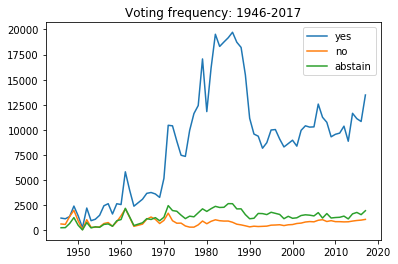

In [247]:
aggreg_votes.plot(title = 'Voting frequency: 1946-2017').set_xlabel("")

**Proportions: 'yes', 'no', 'abstain' votes within all the years**  

Proportion of 'yes' votes

In [248]:
aggreg_votes['percent "yes"'] = (aggreg_votes['yes'] / (aggreg_votes['yes'] + aggreg_votes['no'] + aggreg_votes['abstain']))

Proportion of 'no' votes

In [249]:
aggreg_votes['percent "no"'] = (aggreg_votes['no'] / (aggreg_votes['yes'] + aggreg_votes['no'] + aggreg_votes['abstain']))

Proportion of 'abstain' votes

In [250]:
aggreg_votes['percent "abstain"'] = (aggreg_votes['abstain'] / (aggreg_votes['yes'] + aggreg_votes['no'] + aggreg_votes['abstain']))
aggreg_votes.head()

,yes,no,abstain,"percent ""yes""","percent ""no""","percent ""abstain"""
year,,,,,,
1946,1229,644,270,0.573495,0.300513,0.125992
1947,1161,599,279,0.569397,0.293771,0.136832
1948,1381,1383,690,0.399826,0.400405,0.199768
1949,2425,1996,1279,0.425439,0.350175,0.224386
1950,1447,951,513,0.497080,0.326692,0.176228


Plot: Proportions of 'yes', 'no' and 'abstain' votes

In [251]:
years_votes_perc = aggreg_votes.iloc[:, 3:6]
years_votes_perc.head()

,"percent ""yes""","percent ""no""","percent ""abstain"""
year,,,
1946,0.573495,0.300513,0.125992
1947,0.569397,0.293771,0.136832
1948,0.399826,0.400405,0.199768
1949,0.425439,0.350175,0.224386
1950,0.497080,0.326692,0.176228


Text(0.5,0,'')

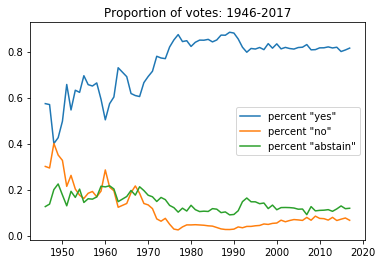

In [252]:
years_votes_perc.plot(title = 'Proportion of votes: 1946-2017').set_xlabel("")

### <center>Countries</center>

The list of memberhip countries ilustrates the changes on the international arena caused by historical transformations, the list includes for example: Yemen, Democratic Yemen and Yemen People's Republic or German Democratic Republic, Federal Republic of Germany and Germany.

#### The list of countries nad their voting fequency 

In [253]:
UN.country.count()

768501

In [254]:
votes_total

768669

In [255]:
pd.set_option('display.max_rows', 200)

UN.country.value_counts()

Canada                                                  5577
Netherlands                                             5569
Denmark                                                 5569
Australia                                               5567
Norway                                                  5564
New Zealand                                             5563
United States of America                                5559
Belgium                                                 5559
Russian Federation                                      5558
Sweden                                                  5555
India                                                   5555
Mexico                                                  5551
Brazil                                                  5541
Ukraine                                                 5540
United Kingdom of Great Britain and Northern Ireland    5540
Venezuela, Bolivarian Republic of                       5535
Argentina               

**County + year + votes ('yes', 'no', 'abstain')**

In [256]:
countries_years = UN.loc[:, ('country', 'year', 'vote')]
countries_years.head()


,country,year,vote
1,United States of America,1946,1
2,Canada,1946,3
4,Cuba,1946,1
5,Haiti,1946,1
6,Dominican Republic,1946,1


In [257]:
countries_years.vote.value_counts()

1    613058
2     98627
3     56984
Name: vote, dtype: int64

#### 'vote' variable as dummy  

In [258]:
pd.get_dummies(countries_years.vote).head()

,1,2,3
1,1,0,0
2,0,0,1
4,1,0,0
5,1,0,0
6,1,0,0


In [259]:
vote_dummies = pd.get_dummies(countries_years.vote, prefix = "vote")

In [260]:
countries_years = pd.concat([countries_years, vote_dummies], axis = 1)

In [261]:
countries_years.head()

,country,year,vote,vote_1,vote_2,vote_3
1,United States of America,1946,1,1,0,0
2,Canada,1946,3,0,0,1
4,Cuba,1946,1,1,0,0
5,Haiti,1946,1,1,0,0
6,Dominican Republic,1946,1,1,0,0


In [262]:
del countries_years['vote']

In [263]:
countries_years = countries_years.rename(columns = {'vote_1': 'yes', 'vote_2': 'abstain', 'vote_3': 'no'}) 
countries_years.head()

,country,year,yes,abstain,no
1,United States of America,1946,1,0,0
2,Canada,1946,0,0,1
4,Cuba,1946,1,0,0
5,Haiti,1946,1,0,0
6,Dominican Republic,1946,1,0,0


In [264]:
# countries 
countries_years.country.count()

768501

In [265]:
type(countries_years)

pandas.core.frame.DataFrame

Visualisation: country, years and vote

In [266]:
countries_years = countries_years.groupby(['country', 'year']).sum()

# pd.set_option('display.max_rows', 2000)

countries_years.head()

yes  abstain  no
country     year                  
Afghanistan 1946    7        7   3
            1947   13       12   9
            1948   22       31  11
            1949   37       30  14
            1950   35       12   3

In [267]:
# PROBLEM
# amount of values slightly different than before dummyfing
# countries_years.vote.value_counts()
#before:
#1    613058
#2     98627
#3     56984

countries_years['yes'].sum()

612953

In [268]:
countries_years['no'].sum()

56963

In [269]:
countries_years['abstain'].sum()

98585

**Visualisation of five permanent members of the UN Security Council: China, France, Russian Federation, the United Kingdom, and the United States**

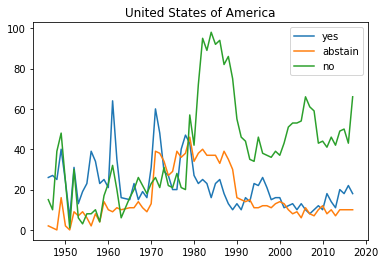

In [270]:
usa = countries_years.loc['United States of America'].plot(title = 'United States of America').set_xlabel("")

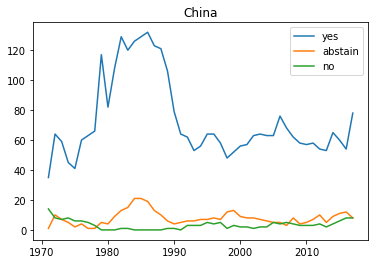

In [271]:
china = countries_years.loc['China'].plot(title = 'China').set_xlabel("")

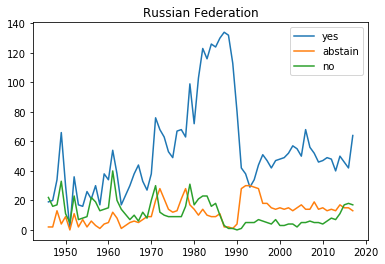

In [272]:
russia = countries_years.loc['Russian Federation'].plot(title = 'Russian Federation').set_xlabel("")

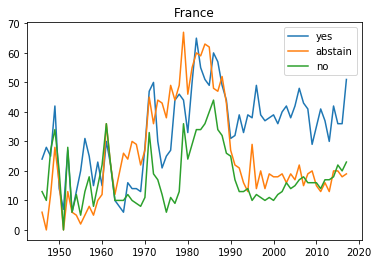

In [273]:
france = countries_years.loc['France'].plot(title = 'France').set_xlabel("")

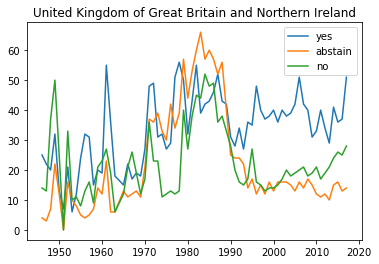

In [274]:
gb = countries_years.loc['United Kingdom of Great Britain and Northern Ireland'].plot(title = 'United Kingdom of Great Britain and Northern Ireland').set_xlabel("")

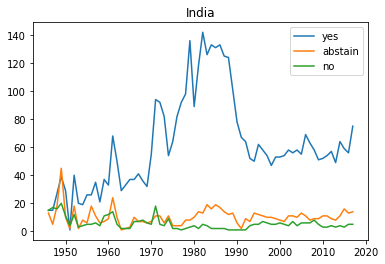

In [275]:
india = countries_years.loc['India'].plot(title = 'India').set_xlabel("")

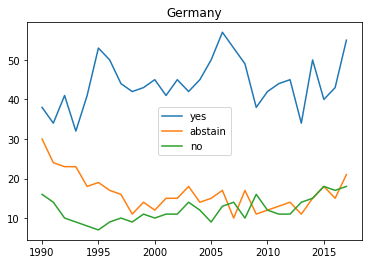

In [276]:
germany = countries_years.loc['Germany'].plot(title = 'Germany').set_xlabel("")

#### Percentage of 'yes' votes per country

In [277]:
countries_years['perc_yes'] = (countries_years['yes'] / (countries_years['yes'] + countries_years['abstain'] + countries_years['no']))

In [278]:
countries_years.head()

yes  abstain  no  perc_yes
country     year                            
Afghanistan 1946    7        7   3  0.411765
            1947   13       12   9  0.382353
            1948   22       31  11  0.343750
            1949   37       30  14  0.456790
            1950   35       12   3  0.700000

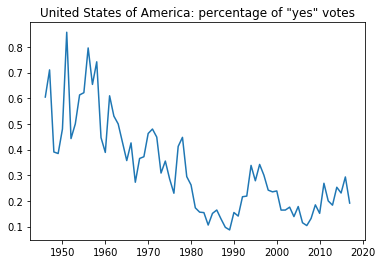

In [279]:
usa = countries_years.perc_yes['United States of America'].plot(title = 'United States of America: percentage of "yes" votes').set_xlabel("")

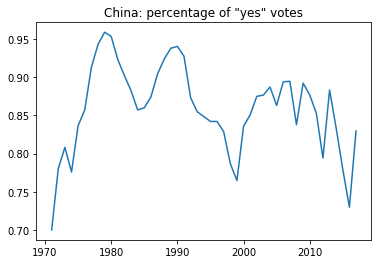

In [280]:
china = countries_years.perc_yes['China'].plot(title = 'China: percentage of "yes" votes').set_xlabel("")

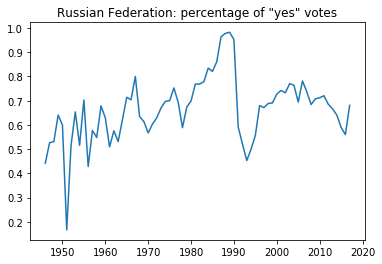

In [281]:
ru = countries_years.perc_yes['Russian Federation'].plot(title = 'Russian Federation: percentage of "yes" votes').set_xlabel("")

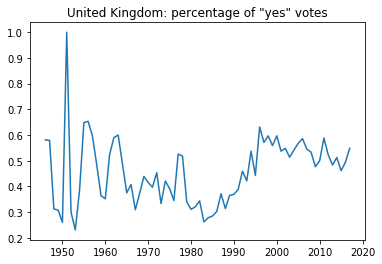

In [282]:
uk = countries_years.perc_yes['United Kingdom of Great Britain and Northern Ireland'].plot(title = 'United Kingdom: percentage of "yes" votes').set_xlabel("")

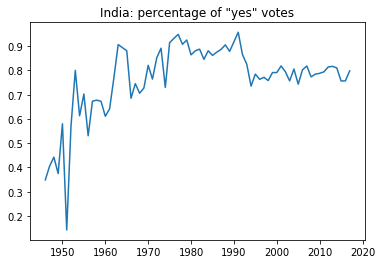

In [283]:
india = countries_years.perc_yes['India'].plot(title = 'India: percentage of "yes" votes').set_xlabel("")

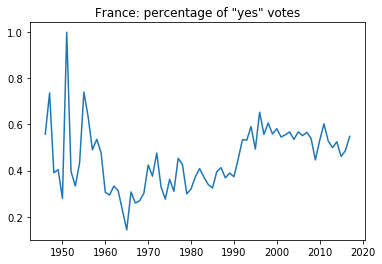

In [284]:
fr = countries_years.perc_yes['France'].plot(title = 'France: percentage of "yes" votes').set_xlabel("")

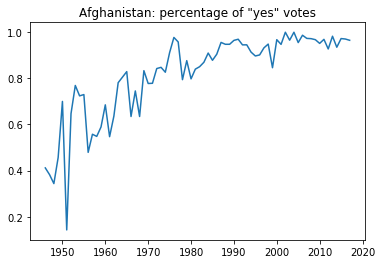

In [285]:
afgh = countries_years.perc_yes['Afghanistan'].plot(title = 'Afghanistan: percentage of "yes" votes').set_xlabel("")

### <center>Subjects</center>


- Palestine

- Nuclear Weapon

- Arms Control

- Human Rights

- Colonialism

- Economic Development

In [286]:
UN_gathered = pd.read_csv("UN_GA_votes.csv", encoding = 'latin-1')

In [287]:
UN_gathered.tail()

,Unnamed: 0,rcid,ccode,session.x,member,vote,Country,Countryname,year.x,session.y,abstain,yes,no,importantvote,date,unres,amend,para,short,year.y,topic,includes_topic
6594931,6594932,5617,552,72.0,1.0,1,ZWE,Zimbabwe,2017,72,14,125,39,1,2017-12-04,A/RES/72/31,NaN,NaN,Taking forward multilateral nuclear disarmamen...,2017,ec,0
6594932,6594933,5618,552,72.0,1.0,1,ZWE,Zimbabwe,2017,72,62,125,0,0,2017-12-04,A/RES/72/25,NaN,NaN,Conclusion of effective international arrangem...,2017,ec,0
6594933,6594934,5638,552,72.0,1.0,1,ZWE,Zimbabwe,2017,72,0,135,2,0,2017-12-08,A/RES/72/129,NaN,NaN,Moderation : resolution / adopted by the Gener...,2017,ec,0
6594934,6594935,5619,552,72.0,1.0,1,ZWE,Zimbabwe,2017,72,27,141,15,0,2017-12-04,A/RES/72/30,NaN,NaN,Humanitarian consequences of nuclear weapons :...,2017,ec,0
6594935,6594936,5588,552,72.0,1.0,1,ZWE,Zimbabwe,2017,72,35,128,9,1,2017-12-21,A/RES/ES-10/19,NaN,NaN,Status of Jerusalem : resolution / adopted by ...,2017,ec,0


In [288]:
UN_subj = UN_gathered.rename(columns = {'Countryname': 'country', 'year.x': 'year', 'importantvote': 'imp_vote'})
UN_subj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6594936 entries, 0 to 6594935
Data columns (total 22 columns):
Unnamed: 0        int64
rcid              int64
ccode             int64
session.x         float64
member            float64
vote              int64
Country           object
country           object
year              int64
session.y         int64
abstain           int64
yes               int64
no                int64
imp_vote          int64
date              object
unres             object
amend             float64
para              float64
short             object
year.y            int64
topic             object
includes_topic    int64
dtypes: float64(4), int64(12), object(6)
memory usage: 1.1+ GB


In [289]:
del UN_subj['Country']
del UN_subj['year.y']

In [290]:
UN_subj = UN_subj[UN_subj.includes_topic == 1]

In [291]:
UN_subj.shape

(1042391, 20)

In [292]:
UN_subj = UN_subj.loc[:,['country', 'year', 'topic', 'vote']].reset_index() #reindex()
UN_subj.head()

,index,country,year,topic,vote
0,14578,United States of America,1947,me,1
1,14579,Canada,1947,me,1
2,14580,Bahamas,1947,me,9
3,14581,Cuba,1947,me,3
4,14582,Haiti,1947,me,1


In [293]:
UN_subj['topic'].value_counts()

me    198397
di    192078
hr    187210
co    183779
nu    142324
ec    138603
Name: topic, dtype: int64

In [294]:
UN_subj['topic'] = UN_subj['topic'].map({"me": "Palestine", "ec": "economic development", "hr": "human rights", "co": "colonialism", "di": "arms control", "nu": "nuclear weapon"})

In [295]:
del UN_subj['index']

In [296]:
UN_subj.head()

,country,year,topic,vote
0,United States of America,1947,Palestine,1
1,Canada,1947,Palestine,1
2,Bahamas,1947,Palestine,9
3,Cuba,1947,Palestine,3
4,Haiti,1947,Palestine,1


In [297]:
# Only countries with yes voting  

UN_subj = UN_subj[UN_subj.vote == 1]
UN_subj.head()

,country,year,topic,vote
0,United States of America,1947,Palestine,1
1,Canada,1947,Palestine,1
4,Haiti,1947,Palestine,1
5,Dominican Republic,1947,Palestine,1
17,Guatemala,1947,Palestine,1


In [298]:
UN_subj_country = UN_subj.groupby(['topic','country', 'year']).count().reset_index()
UN_subj_country.tail()

,topic,country,year,vote
55344,nuclear weapon,Zimbabwe,2012,15
55345,nuclear weapon,Zimbabwe,2013,11
55346,nuclear weapon,Zimbabwe,2014,13
55347,nuclear weapon,Zimbabwe,2015,18
55348,nuclear weapon,Zimbabwe,2017,12


In [299]:
UN_subj_country.vote.sum()

632466

In [300]:
# How to avoid counting years?

topic = UN_subj_country.groupby('topic').sum()
topic.head()

,year,vote
topic,,
Palestine,17271769,127328
arms control,18330777,125028
colonialism,19416859,101449
economic development,18794756,81477
human rights,18455117,107786


In [301]:
del topic['year']

In [302]:
topic.vote.sum()

632466

Text(0.5,0,'')

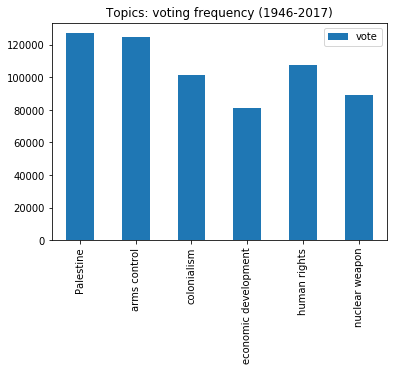

In [303]:
topic.plot(kind = 'bar', title = 'Topics: voting frequency (1946-2017)')
plt.xlabel('')

#### Resolution type by country 

In [304]:
countries_topics = UN_subj_country.groupby('country')
#countries_topics.head()

In [305]:
France_topic = countries_topics.get_group('France') 
France_topic.head()

,topic,country,year,vote
2811,Palestine,France,1947,5
2812,Palestine,France,1948,9
2813,Palestine,France,1949,12
2814,Palestine,France,1950,1
2815,Palestine,France,1952,1


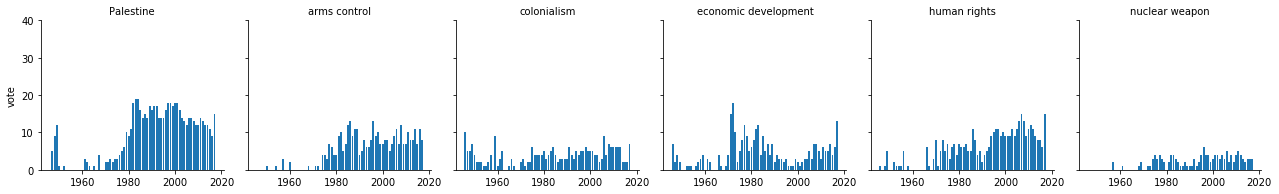

In [306]:
france_gr = sns.FacetGrid(France_topic, col = 'topic')
france_gr.map(plt.bar, 'year', 'vote').set(ylim=(0, 40), xlabel = ('')).set_titles('{col_name}')

In [307]:
USA_topic = countries_topics.get_group('United States of America') 
USA_topic.head()

,topic,country,year,vote
8199,Palestine,United States of America,1947,5
8200,Palestine,United States of America,1948,9
8201,Palestine,United States of America,1949,4
8202,Palestine,United States of America,1952,1
8203,Palestine,United States of America,1956,1


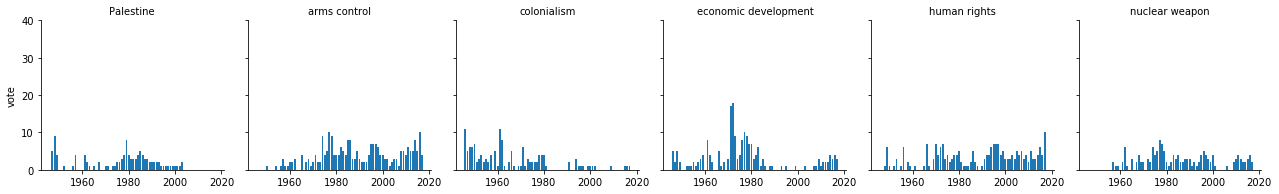

In [308]:
usa_gr = sns.FacetGrid(USA_topic, col = 'topic')
usa_gr.map(plt.bar, 'year', 'vote').set(ylim=(0, 40), xlabel = ('')).set_titles('{col_name}')

In [309]:
RU_topic = countries_topics.get_group('Russian Federation') 
RU_topic.head()

,topic,country,year,vote
6441,Palestine,Russian Federation,1947,6
6442,Palestine,Russian Federation,1948,1
6443,Palestine,Russian Federation,1949,11
6444,Palestine,Russian Federation,1956,1
6445,Palestine,Russian Federation,1957,3


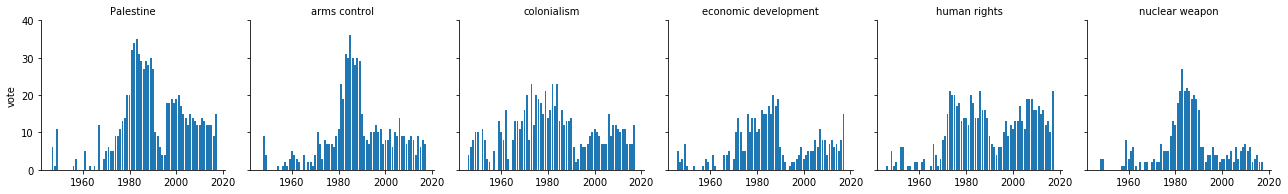

In [310]:
ru_gr = sns.FacetGrid(RU_topic, col = 'topic')
ru_gr.map(plt.bar, 'year', 'vote').set(ylim=(0, 40), xlabel = ('')).set_titles('{col_name}')

In [311]:
China_topic = countries_topics.get_group('China') 
China_topic.head()

,topic,country,year,vote
1627,Palestine,China,1971,5
1628,Palestine,China,1972,4
1629,Palestine,China,1973,5
1630,Palestine,China,1974,9
1631,Palestine,China,1975,6


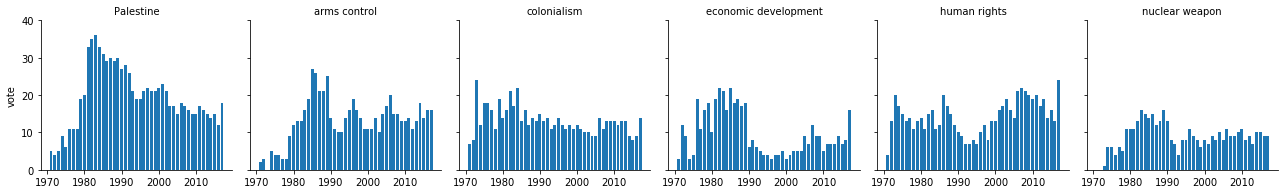

In [312]:
china_gr = sns.FacetGrid(China_topic, col = 'topic')
china_gr.map(plt.bar, 'year', 'vote').set(ylim=(0, 40), xlabel = ('')).set_titles('{col_name}')

In [313]:
India_topic = countries_topics.get_group('India') 
India_topic.head()

,topic,country,year,vote
3603,Palestine,India,1947,4
3604,Palestine,India,1948,1
3605,Palestine,India,1949,11
3606,Palestine,India,1952,2
3607,Palestine,India,1956,1


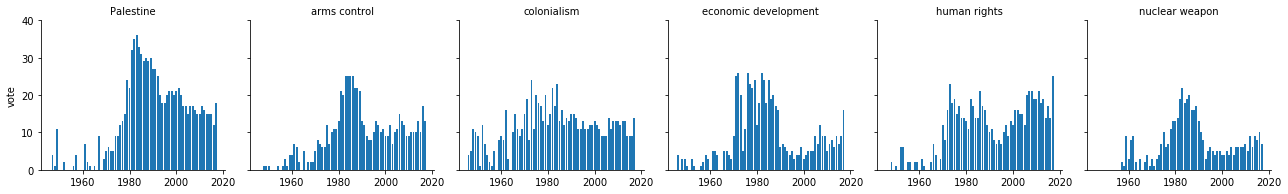

In [314]:
india_gr = sns.FacetGrid(India_topic, col = 'topic')
india_gr.map(plt.bar, 'year', 'vote').set(ylim=(0, 40), xlabel = ('')).set_titles('{col_name}')

In [315]:
UK_topic = countries_topics.get_group('United Kingdom of Great Britain and Northern Ireland') 
UK_topic.head()

,topic,country,year,vote
8090,Palestine,United Kingdom of Great Britain and Northern I...,1947,4
8091,Palestine,United Kingdom of Great Britain and Northern I...,1948,3
8092,Palestine,United Kingdom of Great Britain and Northern I...,1949,3
8093,Palestine,United Kingdom of Great Britain and Northern I...,1952,1
8094,Palestine,United Kingdom of Great Britain and Northern I...,1957,4


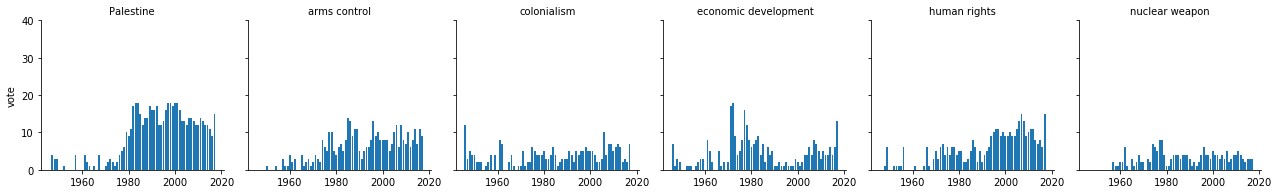

In [316]:
uk_gr = sns.FacetGrid(UK_topic, col = 'topic')
uk_gr.map(plt.bar, 'year', 'vote').set(ylim=(0, 40), xlabel = ('')).set_titles('{col_name}')

## <center>Modeling</center>


**Multiclass clasification problem:**

voting "yes" for resolutions - country agrees with the international consensus 

voting "no" for resolutions - country is against the international consensus

voting "abstain" - formally decline to vote either for or against a resolution

In [317]:
UN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768669 entries, 1 to 1099156
Data columns (total 16 columns):
rcid                    768669 non-null int64
country code            768669 non-null int64
session                 768540 non-null float64
vote                    768669 non-null int64
country                 768501 non-null object
year                    768669 non-null int64
abstain                 768669 non-null int64
yes                     768669 non-null int64
no                      768669 non-null int64
imp_vote                768669 non-null int64
Palestine               768669 non-null int64
nuclear_weapons         768669 non-null int64
disarmament             768669 non-null int64
human_rights            768669 non-null int64
colonization            768669 non-null int64
economic_development    768669 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 119.7+ MB


In [318]:
#UN = UN.dropna() 

### <center>Feature selection</center>

In [319]:
corrMat = UN.corr()
print(corrMat)

                          rcid  country code   session      vote      year  \
rcid                  1.000000      0.044910  0.901074 -0.110606  0.901048   
country code          0.044910      1.000000  0.056337 -0.082215  0.056225   
session               0.901074      0.056337  1.000000 -0.143422  0.999947   
vote                 -0.110606     -0.082215 -0.143422  1.000000 -0.142976   
year                  0.901048      0.056225  0.999947 -0.142976  1.000000   
abstain               0.081927      0.004413  0.090863  0.208942  0.091321   
yes                   0.605938      0.051335  0.704349 -0.387010  0.702906   
no                   -0.005735     -0.008960 -0.031577  0.395791 -0.031361   
imp_vote              0.227877      0.009086  0.234214  0.035370  0.233834   
Palestine             0.160370      0.011632  0.133249 -0.067542  0.133095   
nuclear_weapons       0.094788      0.007599  0.117078 -0.006476  0.116445   
disarmament           0.149555      0.008488  0.170104 -0.039974

In [320]:
del UN['session']
del UN['year']

In [321]:
corrMat = UN.corr()
print(corrMat)

                          rcid  country code      vote   abstain       yes  \
rcid                  1.000000      0.044910 -0.110606  0.081927  0.605938   
country code          0.044910      1.000000 -0.082215  0.004413  0.051335   
vote                 -0.110606     -0.082215  1.000000  0.208942 -0.387010   
abstain               0.081927      0.004413  0.208942  1.000000 -0.429539   
yes                   0.605938      0.051335 -0.387010 -0.429539  1.000000   
no                   -0.005735     -0.008960  0.395791  0.070245 -0.458035   
imp_vote              0.227877      0.009086  0.035370  0.261607  0.017986   
Palestine             0.160370      0.011632 -0.067542 -0.030229  0.154641   
nuclear_weapons       0.094788      0.007599 -0.006476  0.011775  0.089958   
disarmament           0.149555      0.008488 -0.039974 -0.007574  0.171454   
human_rights          0.167486      0.009909  0.062987  0.242028 -0.019431   
colonization         -0.032690      0.000024 -0.013514 -0.013873

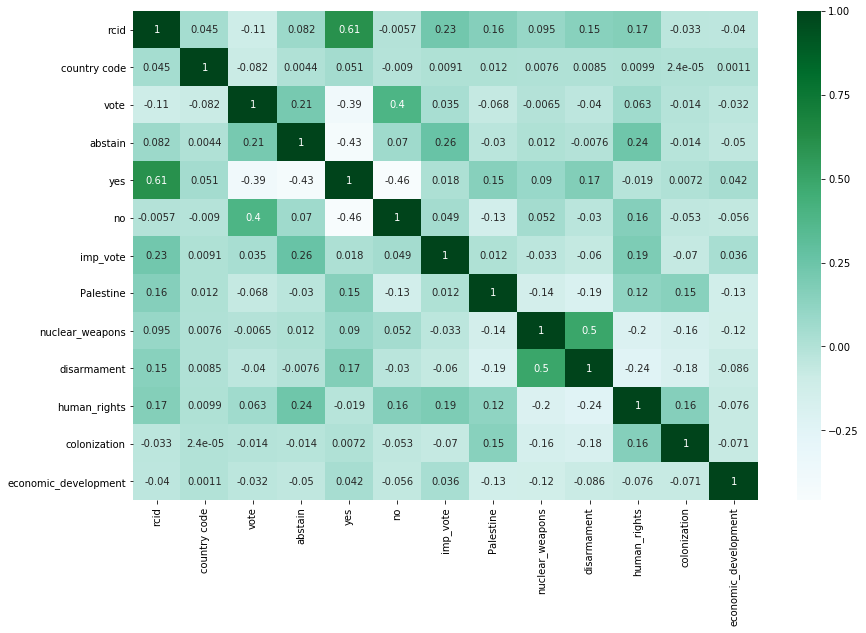

In [322]:
plt.subplots(figsize=(14, 9))
sns.heatmap(corrMat, cmap="BuGn", annot=True)
plt.show()

In [323]:
features = UN.drop(['vote', 'country'], axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768669 entries, 1 to 1099156
Data columns (total 12 columns):
rcid                    768669 non-null int64
country code            768669 non-null int64
abstain                 768669 non-null int64
yes                     768669 non-null int64
no                      768669 non-null int64
imp_vote                768669 non-null int64
Palestine               768669 non-null int64
nuclear_weapons         768669 non-null int64
disarmament             768669 non-null int64
human_rights            768669 non-null int64
colonization            768669 non-null int64
economic_development    768669 non-null int64
dtypes: int64(12)
memory usage: 96.2 MB


In [324]:
dep_var = UN.vote
dep_var.head()

1    1
2    3
4    1
5    1
6    1
Name: vote, dtype: int64

In [325]:
dep_var.value_counts()

1    613058
2     98627
3     56984
Name: vote, dtype: int64

In [326]:
features.shape, dep_var.shape

((768669, 12), (768669,))

### <center>Train/test split</center>

In [327]:
X_train, X_test, y_train, y_test = train_test_split(features, dep_var, test_size = 0.30, random_state = 15)

In [328]:
print (X_train.shape, X_test.shape)

(538068, 12) (230601, 12)


In [329]:
print(y_train.shape, y_test.shape)

(538068,) (230601,)


#### Null accuracy

In [330]:
# compering with null accuracy
# null accuracy - accuracy that could be achieved by always predicting the most frequent class

# examination of the class distribution indicates the class unbalance

y_test.value_counts()

1    183929
2     29514
3     17158
Name: vote, dtype: int64

In [331]:
# calculate null accuracy (for multi-class classification problems)

y_test.value_counts().head(1) / len(y_test)

1    0.797607
Name: vote, dtype: float64

## <center>Models</center>

In [332]:
modelKNN = KNeighborsClassifier()   
modelSVM = svm.SVC()
modelRF = RandomForestClassifier()
modelLR = LogisticRegression()
modelDTC = DecisionTreeClassifier()
modelETC = ExtraTreeClassifier()
modelNC = NearestCentroid()
modelNB = BernoulliNB()

#### Metrics 

Scoring:
'accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score'

#### Linear Regression: 10 fold Cross-Validation
accuracy 0.8060858388339331 (not better than null accuracy)

In [333]:
# The first method: CV

LR_cv = cross_val_score(modelLR, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
print(LR_cv)

0.8060858388339331


In [334]:
# the second method: train/test split
LRtrain = modelLR.fit(X_train, y_train)
print(LRtrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [335]:
LRtest_pred = LRtrain.predict(X_test)
LRtest_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [336]:
accuracy_score(y_test, LRtest_pred)

0.8062194006097112

In [337]:
cohen_kappa_score(y_test, LRtest_pred)

0.229468278036686

#### KNN: 10 fold Cross-Validation
accuracy: 0.8636454852634149

In [338]:
KNN_cv = cross_val_score(modelKNN, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
print(KNN_cv)

0.8636454852634149


accuracy: 0.8636454852634149 

classification error: 0.4 (1- accuracy)

precision_macro: 0.7454029534861595 

recall_macro: 0.6634242721725718

recall_micro: 0.86352421328526

completeness_score:0.34448101444031476

f1_macro: 0.6977675464002393  

In [339]:
# the second method: train/test split
KNNtrain = modelKNN.fit(X_train, y_train)
print(KNNtrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [340]:
KNNtest_pred = KNNtrain.predict(X_test)
KNNtest_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [341]:
accuracy_score(y_test, KNNtest_pred)

0.8661410835165503

In [342]:
cohen_kappa_score(y_test, KNNtest_pred)

0.5689735889615082

In [343]:
RF_cv = cross_val_score(modelRF, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
RF_cv

0.8615937035714334

In [344]:
# the second method: train/test split
RFtrain = modelRF.fit(X_train, y_train)
print(RFtrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [345]:
RFtest_pred = RFtrain.predict(X_test)
RFtest_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [346]:
accuracy_score(y_test, RFtest_pred)

0.8649658934696727

In [347]:
cohen_kappa_score(y_test, RFtest_pred)

0.5847418408106226

#### Naive Bayes (BernoulliNB): 10 fold cross_validation
accuracy: 0.7977318849425535

In [348]:
modelNB = BernoulliNB()
NB_cv = cross_val_score(modelNB, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
print(NB_cv)

0.7977318849425535


In [349]:
# the second method: train/test split
NBtrain = modelNB.fit(X_train, y_train)
print(NBtrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [350]:
NBtest_pred = RFtrain.predict(X_test)
NBtest_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [351]:
accuracy_score(y_test, NBtest_pred)

0.8649658934696727

In [352]:
cohen_kappa_score(y_test, NBtest_pred)

0.5847418408106226

#### Nearest Centroid
accuracy: 0.47926655837504306

In [353]:
modelNC = NearestCentroid()
NC_cv = cross_val_score(modelNC, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
print(NC_cv)

0.47926655837504306


In [354]:
# the second method: train/test split
NCtrain = modelNC.fit(X_train, y_train)
print(NCtrain)

NearestCentroid(metric='euclidean', shrink_threshold=None)


In [355]:
NCtest_pred = NCtrain.predict(X_test)
NCtest_pred

array([1, 1, 3, ..., 1, 1, 1], dtype=int64)

In [356]:
accuracy_score(y_test, NCtest_pred)

0.47794675651883556

In [357]:
cohen_kappa_score(y_test, NCtest_pred)

0.04346121420020055

#### Extra Tree Classifier
accuracy: 0.8324747048803258

In [358]:
ETC_cv = cross_val_score(modelETC, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
print(ETC_cv)

0.8320175307002524


In [359]:
# the second method: train/test split
ETCtrain = modelETC.fit(X_train, y_train)
print(ETCtrain)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')


In [360]:
ETCtest_pred = ETCtrain.predict(X_test)
ETCtest_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [361]:
accuracy_score(y_test, ETCtest_pred)

0.8323120888461022

In [362]:
cohen_kappa_score(y_test, ETCtest_pred)

0.5068388095058836

#### Decision Tree Classifier
accuracy: 0.8907665895814475

In [363]:
DTC_cv = cross_val_score(modelDTC, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
print(DTC_cv)

0.8905900295192032


accuracy: 0.890795204703625

recall_micro: 0.8907691752797062

recall_macro: 0.7857934387852745

precision_micro: 0.89091047270615

precission_makro: 0.7829018768904199 

completeness_score: 0.4414637544014301 

f1_mirco: 0.8907673183412456 

f1_micro: 0.7838810477390564

In [364]:
# the second method: train/test split
DTCtrain = modelDTC.fit(X_train, y_train)
print(DTCtrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [365]:
DTCtest_pred = DTCtrain.predict(X_test)
DTCtest_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [366]:
accuracy_score(y_test, DTCtest_pred)

0.8942285592863864

In [367]:
cohen_kappa_score(y_test, DTCtest_pred)

0.6917430406515057

In [368]:
importances = DTCtrain.feature_importances_
print(importances)

[0.11362009 0.41184863 0.14552785 0.11465435 0.14438287 0.00966898
 0.01510761 0.00801344 0.00866427 0.01117976 0.01077094 0.0065612 ]


In [369]:
indices = np.argsort(importances)[::-1]
indices

array([ 1,  2,  4,  3,  0,  6,  9, 10,  5,  8,  7, 11], dtype=int64)

In [370]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768669 entries, 1 to 1099156
Data columns (total 12 columns):
rcid                    768669 non-null int64
country code            768669 non-null int64
abstain                 768669 non-null int64
yes                     768669 non-null int64
no                      768669 non-null int64
imp_vote                768669 non-null int64
Palestine               768669 non-null int64
nuclear_weapons         768669 non-null int64
disarmament             768669 non-null int64
human_rights            768669 non-null int64
colonization            768669 non-null int64
economic_development    768669 non-null int64
dtypes: int64(12)
memory usage: 96.2 MB


In [371]:
print("feature importance")
for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

feature importance
1. feature 1 (0.411849)
2. feature 2 (0.145528)
3. feature 4 (0.144383)
4. feature 3 (0.114654)
5. feature 0 (0.113620)
6. feature 6 (0.015108)
7. feature 9 (0.011180)
8. feature 10 (0.010771)
9. feature 5 (0.009669)
10. feature 8 (0.008664)
11. feature 7 (0.008013)
12. feature 11 (0.006561)


##### Confusion matrix: Decision Tree Classifier


In [372]:
#from sklearn.model_selection import cross_val_predict
#from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(modelDTC, X_train, y_train, cv=10)
conf_mat = confusion_matrix(y_train, y_pred)
print(conf_mat)

[[403904  20624   4601]
 [ 19690  44646   4777]
 [  4399   4887  30540]]


In [373]:
# print the first 35 true and predicted responses

#print('True:', y_test.values[0:35])
#print('Pred:', KNN_pred[0:35])


print('True:', dep_var.values[0:35])
print('Pred:', DTCtest_pred[0:35])

True: [1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 3 3 1 1 3 3 3 3 3 3]
Pred: [1 1 1 2 1 1 1 1 2 1 1 1 3 1 1 1 1 1 2 2 1 1 1 1 1 1 3 1 1 2 1 1 1 1 1]


### GridSearch

In [374]:
modelDTC.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [375]:
parameters = {'min_samples_split':[2,4,6,10,15,25], 'min_samples_leaf':[1,2,4,10],'max_depth':[None,4,10,15],
 'splitter' : ('best','random')}

grid = GridSearchCV(modelDTC, parameters, cv = 10, scoring = 'accuracy', n_jobs = -1) 
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 4, 6, 10, 15, 25], 'min_samples_leaf': [1, 2, 4, 10], 'max_depth': [None, 4, 10, 15], 'splitter': ('best', 'random')},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [376]:
grid.grid_scores_

[mean: 0.89059, std: 0.00126, params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'},
 mean: 0.87380, std: 0.00155, params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'},
 mean: 0.89259, std: 0.00133, params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'},
 mean: 0.87941, std: 0.00157, params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'},
 mean: 0.89347, std: 0.00110, params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'best'},
 mean: 0.88056, std: 0.00148, params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'random'},
 mean: 0.89376, std: 0.00090, params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'},
 mean: 0.88246, std: 0.00107, params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'spli

In [377]:
# there is one tuple for each trial of CV
# examine the first tuple: _[0]. 

print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
[0.88929156 0.89183764 0.8928598  0.89098073 0.88997714 0.89190997
 0.88917593 0.88902725 0.88978924 0.89101385]
0.890586319944691


In [378]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.890586319944691, 0.873798479002654, 0.8925879256896898, 0.8794092939925808, 0.893470713738784, 0.8805559892058253, 0.8937550644156501, 0.8824553773872448, 0.8933257506486169, 0.8807827263468558, 0.8921641874261246, 0.8790450277660072, 0.8943999643167778, 0.880894236416215, 0.8944947478757331, 0.8808421983838474, 0.8943888133098419, 0.8820223466178996, 0.8946136919497164, 0.8819814595924679, 0.8940524246006081, 0.8800263163763687, 0.8925135856434503, 0.877879747541203, 0.8938870179977252, 0.8804723566538059, 0.8938219704572656, 0.8795877101035556, 0.8937383379052461, 0.8792940669209096, 0.8937494889121821, 0.8795672665908398, 0.8937829419329899, 0.8796378896347673, 0.8922812729989518, 0.8772887441735989, 0.8909004066400529, 0.8738282150211497, 0.8909710296839805, 0.8745957759985726, 0.8909320011597047, 0.8737167049517904, 0.8908706706215571, 0.8739527345986009, 0.8909450106677966, 0.8743151423240185, 0.8906662354943985, 0.8737222804552585, 0.8238196659158322, 0.805243946861735, 0.823

In [379]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8946136919497164
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
